In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
import ENDF6

In [3]:
#get some cross section data
f = open('xn_data/n-014_Si_028.endf')
lines = f.readlines()
sec = ENDF6.find_section(lines, MF=4, MT=2)  # elastic angular distributions. 
#x, y = ENDF6.read_table(sec)

In [4]:
for i in sec:
    #print(i)
    arr = np.char.split(i)
    #print(np.shape(arr))
    if(np.shape(arr)==()): continue
    #print([np.fromstring(x) for x in arr])

In [5]:
print(ENDF6.list_content(sec))

{(1425, 4, 2)}


In [6]:
sec_el = ENDF6.find_section(lines, MF=3, MT=2)

f.close()

In [7]:
Eel, sigel = ENDF6.read_table(sec_el)

In [8]:
print(Eel)
print(sigel)

[1.00e-05 2.53e-02 1.00e+03 ... 1.46e+08 1.48e+08 1.50e+08]
[0.        0.        0.        ... 0.3265487 0.3183026 0.31026  ]


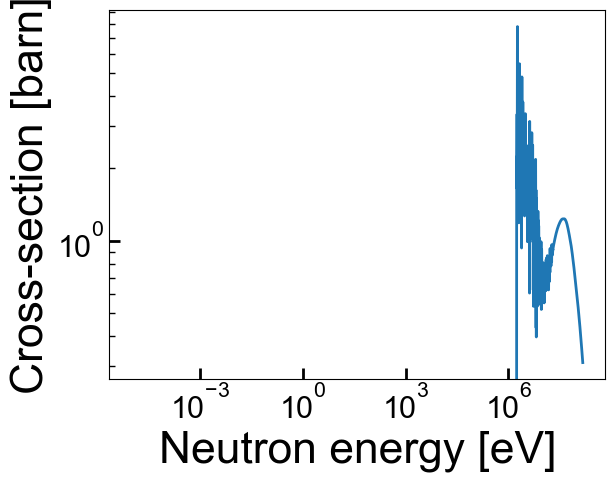

In [9]:
from pylab import *
#plot quick
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot(Eel, sigel)
ax1.set_yscale('log')
ax1.set_xscale('log')
xlabel('Neutron energy [eV]')
ylabel('Cross-section [barn]')
show()

In [10]:
sec_res = ENDF6.find_section(lines, MF=2, MT=151)

In [11]:
for i in sec_res:
    print(i)
    arr = np.char.split(i)
    #print(np.shape(arr))
    if(np.shape(arr)==()): continue
    #print([np.fromstring(x) for x in arr])

 1.402800+4 2.773700+1          0          0          1          01425 2151

 1.402800+4 1.000000+0          0          0          1          01425 2151

 1.000000-5 1.750000+6          1          3          0          11425 2151

 0.000000+0 4.136400-1          1          0          3          31425 2151

 2.773700+1 4.136400-1          0          0         96         161425 2151

-3.622100+6 5.000000-1 3.936200+6 1.453600+2 0.000000+0 0.000000+01425 2151

-8.737300+5 5.000000-1 1.015100-1 1.025300+0 0.000000+0 0.000000+01425 2151

-3.652900+5 5.000000-1 3.040600-2 1.000000+0 0.000000+0 0.000000+01425 2151

-6.315900+4 5.000000-1 4.689400-2 1.000000+0 0.000000+0 0.000000+01425 2151

-4.880100+4 5.000000-1 9.249600-3 1.000000+0 0.000000+0 0.000000+01425 2151

 5.567700+4 5.000000-1 6.533100+2 1.580300+0 0.000000+0 0.000000+01425 2151

 1.816200+5 5.000000-1 3.489400+4 5.600000+0 0.000000+0 0.000000+01425 2151

 3.013100+5 5.000000-1 2.354800+0 3.600000+0 0.000000+0 0.000000+01425 2151


In [12]:
import pandas as pds
si28_elastic = pds.read_csv('xn_data/si28_el.txt', skiprows=11,skipfooter=2, \
                         names=['neutE', 'xn'],sep='\s+',engine='python')

print (si28_elastic.head(100))

si29_elastic = pds.read_csv('xn_data/si29_el.txt', skiprows=11,skipfooter=2, \
                         names=['neutE', 'xn'],sep='\s+',engine='python')

si30_elastic = pds.read_csv('xn_data/si30_el.txt', skiprows=11,skipfooter=2, \
                         names=['neutE', 'xn'],sep='\s+',engine='python')

           neutE         xn
0   1.000000e-11  21.140900
1   1.103040e-11  20.136800
2   1.216690e-11  19.181200
3   1.342060e-11  18.271700
4   1.480340e-11  17.406100
..           ...        ...
95  5.233710e-02   0.347107
96  5.253350e-02   0.298133
97  5.276270e-02   0.238583
98  5.313930e-02   0.138537
99  5.325390e-02   0.108867

[100 rows x 2 columns]


In [13]:
si28_neute = np.asarray(si28_elastic["neutE"],dtype=float)
si28_xn = np.asarray(si28_elastic["xn"],dtype=float)

si29_neute = np.asarray(si29_elastic["neutE"],dtype=float)
si29_xn = np.asarray(si29_elastic["xn"],dtype=float)

si30_neute = np.asarray(si30_elastic["neutE"],dtype=float)
si30_xn = np.asarray(si30_elastic["xn"],dtype=float)

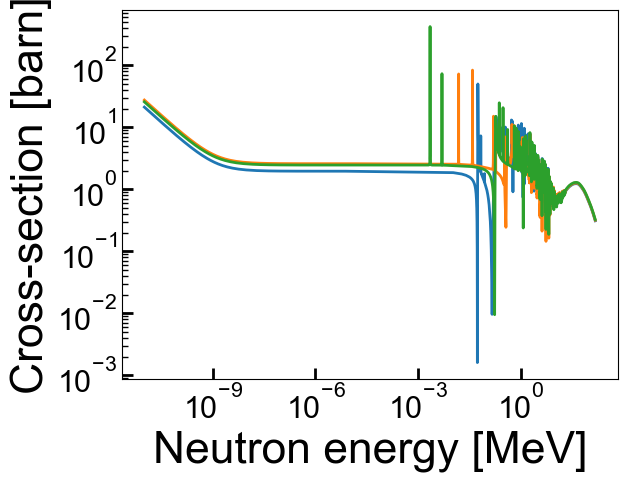

In [14]:
#plot quick
fig = plt.figure()
ax1 = fig.add_subplot(111)
plot(si28_neute, si28_xn)
plot(si29_neute, si29_xn)
plot(si30_neute, si30_xn)
ax1.set_yscale('log')
ax1.set_xscale('log')
xlabel('Neutron energy [MeV]')
ylabel('Cross-section [barn]')
show()

In [43]:
sec = ENDF6.find_section(lines, MF=4, MT=2)
for i in sec:
    #print(i)
    arr = np.char.split(i)
    #print(np.shape(arr))
    if(np.shape(arr)==()): continue
    #print([np.fromstring(x) for x in arr])

In [64]:
arr=np.str_.split(sec[3])
num=int(arr[0])
print(num)
al = np.zeros((num,12))

413


In [65]:
print(np.shape(al))

(413, 12)
